### Title: Nice Price or No Dice
### Author: Cong, Yuxi
### Date: April, 2023
    

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier

#### Read data from certain folder

In [5]:
def proc_csv(pathname):
    
    filename = os.path.basename(pathname)
    asin = filename.split(".")[0]
    df = pd.read_csv(pathname)
    
    # get columns
    df["asin"] = asin # get asin
    df["0"] = pd.to_datetime(df["0"]) #convert to datetime
    df["week"] = df["0"].dt.isocalendar().week # get week number
    df["year"] = df["0"].dt.isocalendar().year # get year number
    df["time"] = df["year"].astype(str)+"-"+ df["week"].astype(str)
    df.drop(["0"],axis= 1)
   
    
    # combine and sort 
    df.rename({"1": "price"},axis=1, inplace = True)
    test = df.groupby(["time","asin"])["price"].min()
    test = test.reset_index()
  

    return test

In [6]:
result = proc_csv('~/Desktop/Capstone/amazon_data/B0B2DRWLMB.png.csv')

In [7]:
# combine all csv in folder to a large dataset
# electronics
source = "/Users/yuxi/Desktop/Capstone/amazon_data/"
files_to_get = os.listdir(source)
files_to_get = list(fn for fn in files_to_get if fn[-3::] == "csv")
all_df = []
for fn in files_to_get:
    full_path = f"{source}/{fn}"
    #print(full_path)
    new_df = proc_csv(full_path)
    all_df.append(new_df)

In [8]:
big_df = pd.concat(all_df,axis=0)
big_df

,time,asin,price
0,2021-44,B07KR2ZL68,62.053571
1,2021-45,B07KR2ZL68,62.053571
2,2021-46,B07KR2ZL68,62.053571
3,2021-47,B07KR2ZL68,62.053571
4,2021-48,B07KR2ZL68,62.053571
...,...,...,...
164,2022-5,B07BZRCBRS,9.221939
165,2022-6,B07BZRCBRS,9.221939
166,2022-7,B07BZRCBRS,9.221939
167,2022-8,B07BZRCBRS,9.221939


In [9]:
big_df["time"].to_list()

['2021-44',
 '2021-45',
 '2021-46',
 '2021-47',
 '2021-48',
 '2021-49',
 '2021-50',
 '2021-51',
 '2021-52',
 '2022-1',
 '2022-10',
 '2022-11',
 '2022-12',
 '2022-13',
 '2022-14',
 '2022-15',
 '2022-16',
 '2022-17',
 '2022-18',
 '2022-19',
 '2022-2',
 '2022-20',
 '2022-21',
 '2022-22',
 '2022-23',
 '2022-24',
 '2022-25',
 '2022-26',
 '2022-27',
 '2022-28',
 '2022-29',
 '2022-3',
 '2022-30',
 '2022-31',
 '2022-32',
 '2022-33',
 '2022-34',
 '2022-35',
 '2022-36',
 '2022-37',
 '2022-38',
 '2022-39',
 '2022-4',
 '2022-40',
 '2022-41',
 '2022-42',
 '2022-43',
 '2022-44',
 '2022-45',
 '2022-46',
 '2022-47',
 '2022-48',
 '2022-49',
 '2022-5',
 '2022-50',
 '2022-51',
 '2022-52',
 '2022-6',
 '2022-7',
 '2022-8',
 '2022-9',
 '2023-1',
 '2023-2',
 '2023-3',
 '2022-48',
 '2022-49',
 '2022-50',
 '2022-51',
 '2022-52',
 '2023-1',
 '2023-2',
 '2023-3',
 '2023-4',
 '2023-5',
 '2023-6',
 '2023-7',
 '2023-8',
 '2022-26',
 '2022-27',
 '2022-28',
 '2022-29',
 '2022-30',
 '2022-31',
 '2022-32',
 '2022-33',


#### Origional dataset is in long format instead of wide format, it should be the wide format to process the analysis.  



In [10]:
final_ele = big_df.pivot_table(index ="asin",columns="time", values ="price" )

In [11]:
final_ele.head()

time,2008-27,2008-28,2008-29,2008-30,2008-31,2008-32,2008-33,2008-34,2008-35,2008-36,...,2022-8,2022-9,2023-1,2023-2,2023-3,2023-4,2023-5,2023-6,2023-7,2023-8
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,35.153061,35.153061,35.153061,35.153061,34.132653,34.132653,34.132653,35.05102,35.05102,35.05102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00001R3W3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.104592,22.104592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00004SY4H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000513US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000068O17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_ele.iloc[:,0].notna().sum()

1

In [13]:
final_ele.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, B00001P4ZH to B0BNWQS56G
Columns: 765 entries, 2008-27 to 2023-8
dtypes: float64(765)
memory usage: 4.0+ MB


In [14]:
df2 = final_ele.drop(final_ele.iloc[:, 0:653],axis = 1)
df3 = df2.drop(df2.iloc[:, -9:],axis = 1)
df3.head()

time,2021-1,2021-10,2021-11,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,...,2022-47,2022-48,2022-49,2022-5,2022-50,2022-51,2022-52,2022-6,2022-7,2022-8
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,49.132653,49.030612,49.132653,49.132653,49.132653,49.030612,49.030612,49.132653,40.153061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,NaN,NaN,NaN,22.104592,NaN,NaN,NaN,22.104592,22.104592,22.104592
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,399.948980,399.948980,400.459184,399.948980,399.948980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000513US,66.377551,66.683673,66.683673,66.683673,66.683673,66.683673,64.846939,64.846939,64.846939,64.846939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000068O17,9.470663,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, B00001P4ZH to B0BNWQS56G
Columns: 103 entries, 2021-1 to 2022-8
dtypes: float64(103)
memory usage: 561.4+ KB


In [16]:
df3.sort_index(axis=1)

time,2021-1,2021-10,2021-11,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,...,2022-47,2022-48,2022-49,2022-5,2022-50,2022-51,2022-52,2022-6,2022-7,2022-8
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,49.132653,49.030612,49.132653,49.132653,49.132653,49.030612,49.030612,49.132653,40.153061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,NaN,NaN,NaN,22.104592,NaN,NaN,NaN,22.104592,22.104592,22.104592
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,399.948980,399.948980,400.459184,399.948980,399.948980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000513US,66.377551,66.683673,66.683673,66.683673,66.683673,66.683673,64.846939,64.846939,64.846939,64.846939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000068O17,9.470663,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BJLDVJTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.539541,123.539541,123.539541,NaN,123.577806,123.577806,123.960459,NaN,NaN,NaN
B0BJLXMR5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2090.433673,2193.750000,2193.750000,NaN,2193.750000,2193.750000,2193.750000,NaN,NaN,NaN
B0BJM63ZF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.169643,123.169643,434.075255,NaN,434.075255,434.075255,521.128827,NaN,NaN,NaN


#### The week's numbers are not in numerical order, rearrang them in the right order.

In [17]:
list("{:02d}".format(i) for i in range(10))

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [18]:
df3.columns

Index(['2021-1', '2021-10', '2021-11', '2021-12', '2021-13', '2021-14',
       '2021-15', '2021-16', '2021-17', '2021-18',
       ...
       '2022-47', '2022-48', '2022-49', '2022-5', '2022-50', '2022-51',
       '2022-52', '2022-6', '2022-7', '2022-8'],
      dtype='object', name='time', length=103)

In [19]:
new_names = []
for col in df3.columns:
    fields = col.split("-")
    year = fields[0]
    week = "{:02d}".format(int(fields[1]))
    names = year+"-"+week
    new_names.append(names)
    #print(year,week)
    print(names)

2021-01
2021-10
2021-11
2021-12
2021-13
2021-14
2021-15
2021-16
2021-17
2021-18
2021-19
2021-02
2021-20
2021-21
2021-22
2021-23
2021-24
2021-25
2021-26
2021-27
2021-28
2021-29
2021-03
2021-30
2021-31
2021-32
2021-33
2021-34
2021-35
2021-36
2021-37
2021-38
2021-39
2021-04
2021-40
2021-41
2021-42
2021-43
2021-44
2021-45
2021-46
2021-47
2021-48
2021-49
2021-05
2021-50
2021-51
2021-52
2021-06
2021-07
2021-08
2021-09
2022-01
2022-10
2022-11
2022-12
2022-13
2022-14
2022-15
2022-16
2022-17
2022-18
2022-19
2022-02
2022-20
2022-21
2022-22
2022-23
2022-24
2022-25
2022-26
2022-27
2022-28
2022-29
2022-03
2022-30
2022-31
2022-32
2022-33
2022-34
2022-35
2022-36
2022-37
2022-38
2022-39
2022-04
2022-40
2022-41
2022-42
2022-43
2022-44
2022-45
2022-46
2022-47
2022-48
2022-49
2022-05
2022-50
2022-51
2022-52
2022-06
2022-07
2022-08


In [20]:
df3.columns = new_names
df3.columns.to_list()

['2021-01',
 '2021-10',
 '2021-11',
 '2021-12',
 '2021-13',
 '2021-14',
 '2021-15',
 '2021-16',
 '2021-17',
 '2021-18',
 '2021-19',
 '2021-02',
 '2021-20',
 '2021-21',
 '2021-22',
 '2021-23',
 '2021-24',
 '2021-25',
 '2021-26',
 '2021-27',
 '2021-28',
 '2021-29',
 '2021-03',
 '2021-30',
 '2021-31',
 '2021-32',
 '2021-33',
 '2021-34',
 '2021-35',
 '2021-36',
 '2021-37',
 '2021-38',
 '2021-39',
 '2021-04',
 '2021-40',
 '2021-41',
 '2021-42',
 '2021-43',
 '2021-44',
 '2021-45',
 '2021-46',
 '2021-47',
 '2021-48',
 '2021-49',
 '2021-05',
 '2021-50',
 '2021-51',
 '2021-52',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2022-01',
 '2022-10',
 '2022-11',
 '2022-12',
 '2022-13',
 '2022-14',
 '2022-15',
 '2022-16',
 '2022-17',
 '2022-18',
 '2022-19',
 '2022-02',
 '2022-20',
 '2022-21',
 '2022-22',
 '2022-23',
 '2022-24',
 '2022-25',
 '2022-26',
 '2022-27',
 '2022-28',
 '2022-29',
 '2022-03',
 '2022-30',
 '2022-31',
 '2022-32',
 '2022-33',
 '2022-34',
 '2022-35',
 '2022-36',
 '2022-37',
 '20

In [21]:
df3

,2021-01,2021-10,2021-11,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,...,2022-47,2022-48,2022-49,2022-05,2022-50,2022-51,2022-52,2022-06,2022-07,2022-08
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,49.132653,49.030612,49.132653,49.132653,49.132653,49.030612,49.030612,49.132653,40.153061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,NaN,NaN,NaN,22.104592,NaN,NaN,NaN,22.104592,22.104592,22.104592
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,399.948980,399.948980,400.459184,399.948980,399.948980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000513US,66.377551,66.683673,66.683673,66.683673,66.683673,66.683673,64.846939,64.846939,64.846939,64.846939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000068O17,9.470663,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,8.322704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BJLDVJTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.539541,123.539541,123.539541,NaN,123.577806,123.577806,123.960459,NaN,NaN,NaN
B0BJLXMR5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2090.433673,2193.750000,2193.750000,NaN,2193.750000,2193.750000,2193.750000,NaN,NaN,NaN
B0BJM63ZF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.169643,123.169643,434.075255,NaN,434.075255,434.075255,521.128827,NaN,NaN,NaN


In [22]:
sorted_df = df3.sort_index(axis=1)

In [23]:
sorted_df

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2022-43,2022-44,2022-45,2022-46,2022-47,2022-48,2022-49,2022-50,2022-51,2022-52
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,36.173469,38.010204,38.112245,38.112245,38.214286,49.030612,49.132653,49.132653,49.132653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,22.104592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0000513US,66.377551,66.377551,66.377551,66.377551,66.377551,66.377551,66.683673,66.683673,66.683673,66.683673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000068O17,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,8.322704,8.322704,8.322704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BJLDVJTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,125.070153,125.070153,125.070153,123.539541,123.539541,123.539541,123.577806,123.577806,123.960459
B0BJLXMR5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2199.872449,2199.872449,2193.750000,2090.433673,2193.750000,2193.750000,2193.750000,2193.750000,2193.750000
B0BJM63ZF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,901.677296,901.677296,901.677296,123.169643,123.169643,434.075255,434.075255,434.075255,521.128827


#### There are some columns are NaN, which means they don't have value on certain cells. 
#### They need to be removed and replaced with actual values. 
#### The reason is that there are prices on cells, if they don't have them filled, models can not be running on. I used a combination of forward and back filling to remove NaN values.  

In [25]:
test1 = sorted_df.fillna(method = "backfill")

In [26]:
test1.isna().sum().to_list()

[241,
 241,
 241,
 241,
 234,
 234,
 234,
 234,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 222,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 180,
 180,
 180,
 180,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 137,
 137,
 137,
 137,
 137,
 127,
 127,
 127,
 127,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 120,
 120,
 120,
 120,
 108,
 108,
 108,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 53,
 53,
 53,
 53,
 47,
 47,
 47,
 47,
 47,
 37,
 37,
 37,
 37,
 19,
 19,
 19,
 19,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 0]

In [27]:
final_data = test1.fillna(method = "ffill")

In [28]:
final_data

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2022-43,2022-44,2022-45,2022-46,2022-47,2022-48,2022-49,2022-50,2022-51,2022-52
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,36.173469,38.010204,38.112245,38.112245,38.214286,49.030612,49.132653,49.132653,49.132653,...,22.104592,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,22.104592,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
B0000513US,66.377551,66.377551,66.377551,66.377551,66.377551,66.377551,66.683673,66.683673,66.683673,66.683673,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
B000068O17,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,8.322704,8.322704,8.322704,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BJLDVJTC,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,490.433673,125.070153,125.070153,125.070153,123.539541,123.539541,123.539541,123.577806,123.577806,123.960459
B0BJLXMR5K,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,490.433673,2199.872449,2199.872449,2193.750000,2090.433673,2193.750000,2193.750000,2193.750000,2193.750000,2193.750000
B0BJM63ZF2,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,490.433673,901.677296,901.677296,901.677296,123.169643,123.169643,434.075255,434.075255,434.075255,521.128827


In [29]:
final_data.isna().sum()

2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
          ..
2022-48    0
2022-49    0
2022-50    0
2022-51    0
2022-52    0
Length: 103, dtype: int64

#### Week 47 in most years is the Thanksgiving/black friday week. To see if a product has a holiday, I need to compare the price of week 47 with week 46. Then create a new column, if there is a price drop, the cell will be "1" and others are "0". 



In [30]:
#final_data.drop(["2022_holiday_price"],axis=1,inplace = True)

In [31]:
# 2022 week 47
final_data["2022_holiday_price"] = final_data.apply(lambda x: 1 if x["2022-46"]>= x["2022-47"] else 0, axis=1)

In [32]:
print(final_data["2022_holiday_price"])

asin
B00001P4ZH    1
B00001R3W3    1
B00004SY4H    1
B0000513US    1
B000068O17    1
             ..
B0BJLDVJTC    1
B0BJLXMR5K    1
B0BJM63ZF2    1
B0BKMPJK3K    1
B0BNWQS56G    1
Name: 2022_holiday_price, Length: 691, dtype: int64


In [33]:
final_data

,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2022-44,2022-45,2022-46,2022-47,2022-48,2022-49,2022-50,2022-51,2022-52,2022_holiday_price
asin,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,36.173469,36.173469,38.010204,38.112245,38.112245,38.214286,49.030612,49.132653,49.132653,49.132653,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1
B00001R3W3,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,20.114796,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1
B00004SY4H,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,400.459184,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1
B0000513US,66.377551,66.377551,66.377551,66.377551,66.377551,66.377551,66.683673,66.683673,66.683673,66.683673,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1
B000068O17,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,9.470663,8.322704,8.322704,8.322704,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0BJLDVJTC,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,125.070153,125.070153,125.070153,123.539541,123.539541,123.539541,123.577806,123.577806,123.960459,1
B0BJLXMR5K,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,2199.872449,2199.872449,2193.750000,2090.433673,2193.750000,2193.750000,2193.750000,2193.750000,2193.750000,1
B0BJM63ZF2,570.000000,570.000000,549.528061,549.528061,72.640306,72.640306,72.640306,72.640306,250.765306,250.765306,...,901.677296,901.677296,901.677296,123.169643,123.169643,434.075255,434.075255,434.075255,521.128827,1


In [34]:
final_data["2022_holiday_price"].sum()

608

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, B00001P4ZH to B0BNWQS56G
Columns: 104 entries, 2021-01 to 2022_holiday_price
dtypes: float64(103), int64(1)
memory usage: 566.8+ KB


In [36]:
sum(final_data["2021-01"]>500)

252


#### Try to find out the percentage of products that over 200 and 500.
#### Then create pie charts to visulize them. 


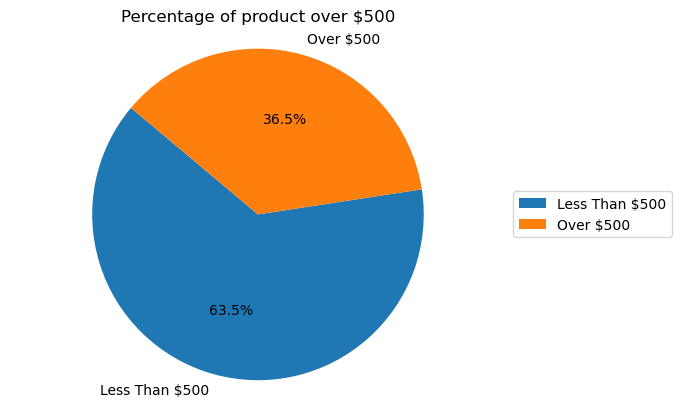

In [54]:
number_500=[691-252,252]
label_500=["Less Than $500","Over $500"]


# Create the pie chart
fig, ax = plt.subplots()  # Create a subplot
wedges, labels, autopct = ax.pie(number_500, labels=label_500, autopct='%1.1f%%', startangle=140)

# Add a legend
ax.legend(loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
ax.set_title("Percentage of product over $500")

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Save the chart as an image
fig.savefig('over $500 pie.png', bbox_inches='tight')

# Display the chart 
plt.show()



#### create pie chart for product over and less than $200


In [38]:
sum(final_data["2021-01"]>200)

314

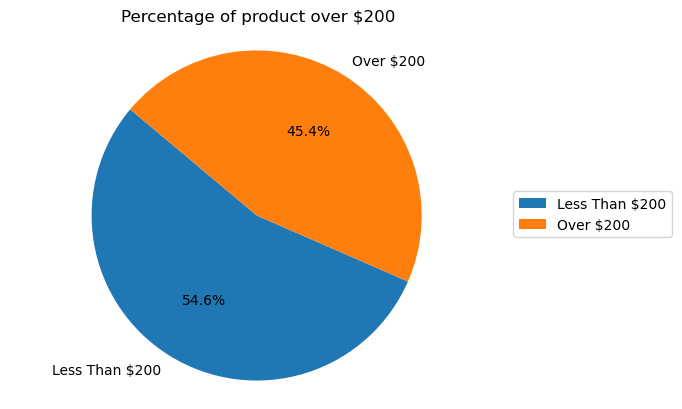

In [55]:
label_200=["Less Than $200","Over $200"]
number_200=[691-314,314]

# Create the pie chart
fig, ax = plt.subplots()  # Create a subplot
wedges, labels, autopct = ax.pie(number_200, labels=label_200, autopct='%1.1f%%', startangle=140)

# Add a legend
ax.legend(loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
ax.set_title("Percentage of product over $200")

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Save the chart as an image
fig.savefig('over $200 pie.png', bbox_inches='tight')

# Display the chart 
plt.show()

#### There are 36.5% and 45.4% of total products are either over 200 or 500. 
#### It shows at least 30% of the product are expensive and people want to save money on that. 

#### To see how many of products have holidday price, plot to see viz of column "2022_holiday_price"

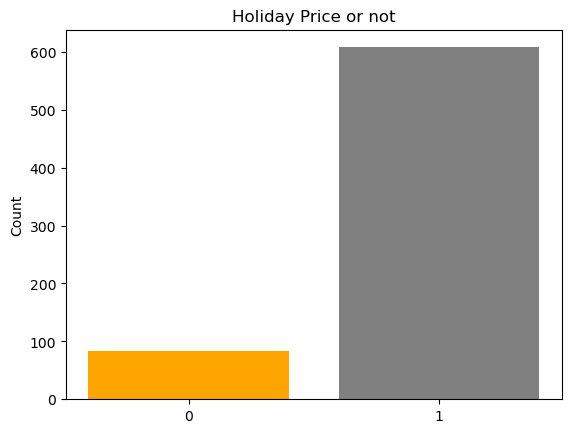

In [32]:
binary_column = final_data['2022_holiday_price']

# Split the values into two arrays
zeros = binary_column[binary_column == 0].count()
ones = binary_column[binary_column == 1].count()

# Create a bar plot of the two arrays
plt.bar(['0', '1'], [zeros, ones],color=['orange', 'grey'])

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Holiday Price or not')

# Show the plot
plt.show()

In [33]:
#2022 w47 

X = final_data.drop(["2022_holiday_price","2021-47","2022-47"],axis=1)
y = final_data["2022_holiday_price"]

#### Before apply any machine learning models, Train/Test split dataset is required. 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =11)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

#### Next, to apply on different models and see the result. 

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the model
log_reg = LogisticRegression(C=1, penalty='l2', random_state=2)

# 2. Fit the model
model = log_reg.fit(X_train_s, y_train)

/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print(log_reg.score(X_test_s, y_test))

0.8605769230769231


In [39]:
y_pred = log_reg.predict(X_test)

/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.18      0.96      0.30        26
           1       0.99      0.37      0.54       182

    accuracy                           0.45       208
   macro avg       0.58      0.67      0.42       208
weighted avg       0.88      0.45      0.51       208



[[TN  FP]

 [FN  TP]]

/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


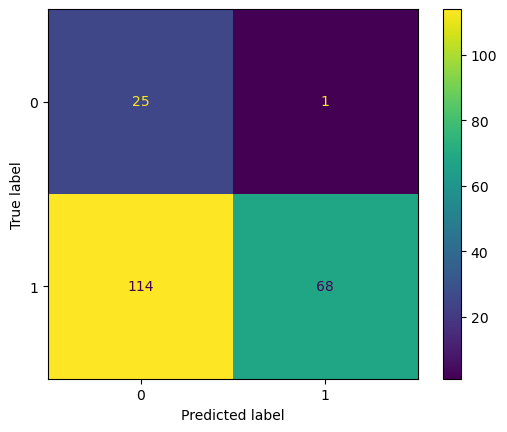

In [42]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)

#### KNN

In [43]:
KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
KNN_model.score(X_test_s,y_test)

/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8894230769230769

In [45]:
y_pred_knn = KNN_model.predict(X_test)

/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/yuxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.11      0.08      0.09        26
           1       0.87      0.91      0.89       182

    accuracy                           0.81       208
   macro avg       0.49      0.49      0.49       208
weighted avg       0.78      0.81      0.79       208



#### Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=35,max_depth=10,random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", rfc.score(X_test, y_test))

Accuracy: 0.8990384615384616


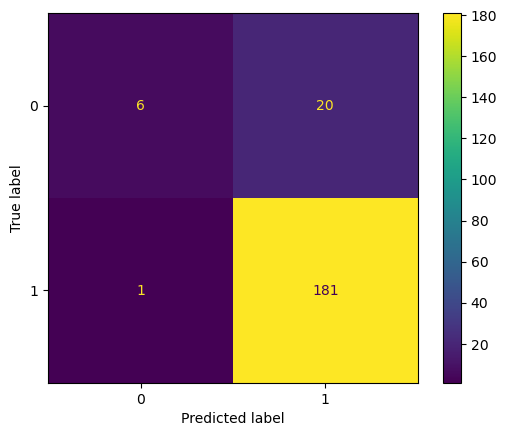

In [49]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [50]:
y_pred_rfc = rfc.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.23      0.36        26
           1       0.90      0.99      0.95       182

    accuracy                           0.90       208
   macro avg       0.88      0.61      0.65       208
weighted avg       0.90      0.90      0.87       208



#### Decision Tree


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=4)
DT_model.fit(X_train, y_train)


# Evaluate its classification accuracy 

print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT test set accuracy: 0.9278846153846154


In [54]:
from sklearn.tree import plot_tree

In [55]:
DT_model.feature_importances_

array([0.        , 0.        , 0.        , 0.06937365, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03305451, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02312151, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02938178, 0.07236614, 0.        , 0.06296

[Text(0.4166666666666667, 0.9, '2022-49 <= 30.008\nsamples = 483\nvalue = [57, 426]'),
 Text(0.19047619047619047, 0.7, '2022-16 <= 1851.786\nsamples = 170\nvalue = [3, 167]'),
 Text(0.09523809523809523, 0.5, '2022-52 <= 94.675\nsamples = 163\nvalue = [1, 162]'),
 Text(0.047619047619047616, 0.3, 'samples = 160\nvalue = [0, 160]'),
 Text(0.14285714285714285, 0.3, '2022-22 <= 24.668\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09523809523809523, 0.1, 'samples = 1\nvalue = [1, 0]'),
 Text(0.19047619047619047, 0.1, 'samples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.5, '2022-25 <= 12.816\nsamples = 7\nvalue = [2, 5]'),
 Text(0.23809523809523808, 0.3, 'samples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'samples = 5\nvalue = [0, 5]'),
 Text(0.6428571428571429, 0.7, '2022-46 <= 30.051\nsamples = 313\nvalue = [54, 259]'),
 Text(0.47619047619047616, 0.5, '2022-44 <= 15.003\nsamples = 32\nvalue = [22, 10]'),
 Text(0.42857142857142855, 0.3, 'samples = 5\nvalue = [0, 5]'),
 Text(0.523

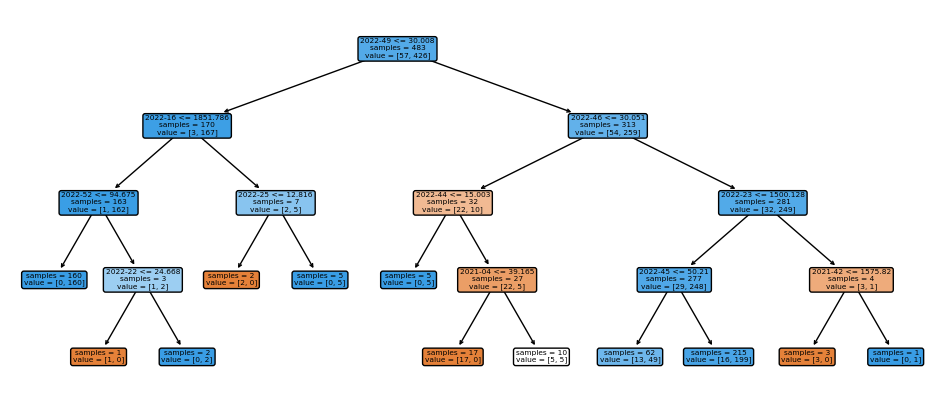

In [56]:
plt.figure(figsize=(12,5)) 
plot_tree(DT_model, 
          feature_names=X.columns, 
          rounded=True,
          impurity=False,
          filled=True)

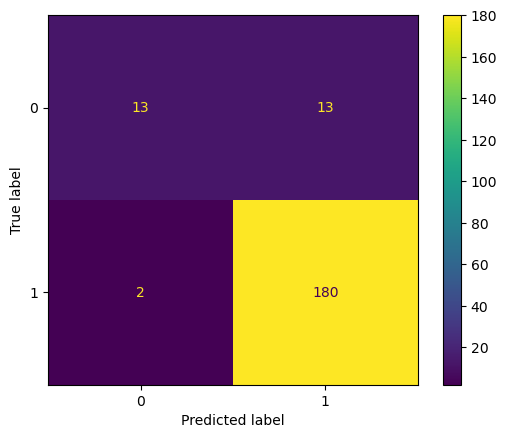

In [57]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test)

In [58]:
y_pred_dt = DT_model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63        26
           1       0.93      0.99      0.96       182

    accuracy                           0.93       208
   macro avg       0.90      0.74      0.80       208
weighted avg       0.92      0.93      0.92       208



add 2021- week- 47 back as feature

In [60]:
#
X = final_data.drop(["2022_holiday_price","2022-47"],axis=1)
y = final_data["2022_holiday_price"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =11)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [63]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=4)
DT_model.fit(X_train, y_train)


# Evaluate its classification accuracy 

print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT test set accuracy: 0.9278846153846154


In [64]:
y_pred_dt = DT_model.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63        26
           1       0.93      0.99      0.96       182

    accuracy                           0.93       208
   macro avg       0.90      0.74      0.80       208
weighted avg       0.92      0.93      0.92       208



[Text(0.4166666666666667, 0.9, '2022-49 <= 30.008\nsamples = 483\nvalue = [57, 426]'),
 Text(0.19047619047619047, 0.7, '2022-19 <= 1851.786\nsamples = 170\nvalue = [3, 167]'),
 Text(0.09523809523809523, 0.5, '2022-52 <= 94.675\nsamples = 163\nvalue = [1, 162]'),
 Text(0.047619047619047616, 0.3, 'samples = 160\nvalue = [0, 160]'),
 Text(0.14285714285714285, 0.3, '2022-34 <= 23.163\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09523809523809523, 0.1, 'samples = 2\nvalue = [0, 2]'),
 Text(0.19047619047619047, 0.1, 'samples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.5, '2022-44 <= 11.74\nsamples = 7\nvalue = [2, 5]'),
 Text(0.23809523809523808, 0.3, 'samples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'samples = 5\nvalue = [0, 5]'),
 Text(0.6428571428571429, 0.7, '2022-46 <= 30.051\nsamples = 313\nvalue = [54, 259]'),
 Text(0.47619047619047616, 0.5, '2022-44 <= 15.003\nsamples = 32\nvalue = [22, 10]'),
 Text(0.42857142857142855, 0.3, 'samples = 5\nvalue = [0, 5]'),
 Text(0.5238

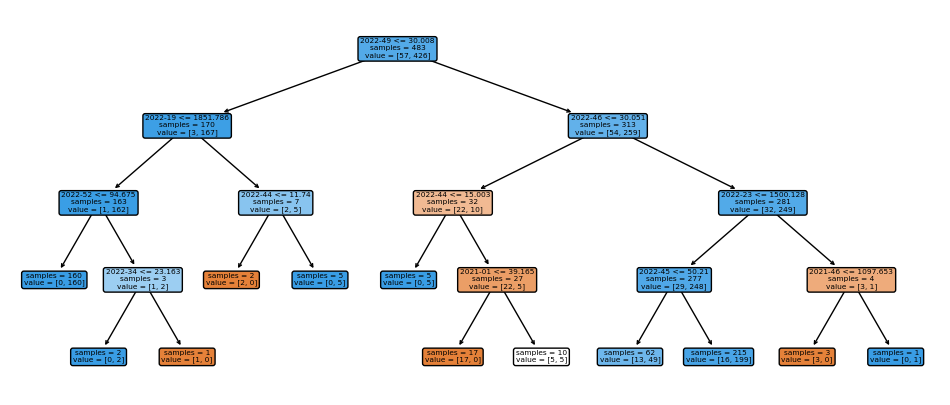

In [66]:
plt.figure(figsize=(12,5)) 
plot_tree(DT_model, 
          feature_names=X.columns, 
          rounded=True,
          impurity=False,
          filled=True)